# Master Dataframe

We will be combining our water, conflict and demographic data into one master dataframe to be readily used for analysis and modelling.

In [47]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages.py

In [2]:
# import useful functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py

In [3]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

## Loading datasets

In [4]:
#water points
water_df=pd.read_csv(filepath + 'uganda_water_df_clean.csv')

#check
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 108257 non-null  int64  
 1   row_id                     108257 non-null  int64  
 2   source                     108257 non-null  object 
 3   lat_deg                    108257 non-null  float64
 4   lon_deg                    108257 non-null  float64
 5   report_date                108257 non-null  object 
 6   status_id                  108257 non-null  int64  
 7   facility_type              108257 non-null  object 
 8   clean_country_name         108257 non-null  object 
 9   clean_adm1                 108257 non-null  object 
 10  clean_adm2                 108257 non-null  object 
 11  clean_adm3                 108257 non-null  object 
 12  clean_adm4                 108257 non-null  object 
 13  distance_to_primary        10

In [5]:
#conflict events
conflict_df=pd.read_csv(filepath +'uganda_conflict_df_clean.csv')

#check
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7793 non-null   int64  
 1   data_id         7793 non-null   int64  
 2   event_date      7793 non-null   object 
 3   event_type      7793 non-null   object 
 4   sub_event_type  7793 non-null   object 
 5   actor1          7793 non-null   object 
 6   assoc_actor_1   1920 non-null   object 
 7   inter1          7793 non-null   int64  
 8   actor2          6551 non-null   object 
 9   assoc_actor_2   1647 non-null   object 
 10  inter2          7793 non-null   int64  
 11  interaction     7793 non-null   int64  
 12  clean_adm1      7793 non-null   object 
 13  clean_adm2      7793 non-null   object 
 14  clean_adm3      7793 non-null   object 
 15  clean_adm4      7793 non-null   object 
 16  latitude        7793 non-null   float64
 17  longitude       7793 non-null   f

In [6]:
#demographic variables
demographic_df=pd.read_csv(filepath +'subcounty_demographic_clean.csv')

#check
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1382 non-null   int64  
 1   clean_adm4                   1382 non-null   object 
 2   perc_hh_head_male            1382 non-null   float64
 3   perc_pop612_primary          1382 non-null   float64
 4   perc_pop1318_secondary       1382 non-null   float64
 5   perc_pop18p_illiterate       1382 non-null   float64
 6   perc_pop017_certificate      1382 non-null   float64
 7   perc_pop017_both_parents     1382 non-null   float64
 8   perc_pop2p_disability        1382 non-null   float64
 9   perc_pop1017_married         1382 non-null   float64
 10  perc_pop1217_birth           1382 non-null   float64
 11  perc_pop1464_working         1382 non-null   float64
 12  perc_pop10p_mobile_phone     1382 non-null   float64
 13  perc_hh_temp_dwell

## Merge datasets

We want to get demographic information for each water point at its most local level.

In [7]:
#merge water dataset with demographic dataset
master_df=pd.merge(water_df, demographic_df, how='left',\
                               left_on=water_df['clean_adm4'],\
                               right_on=demographic_df['clean_adm4'], suffixes=['x', 'y'])

#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108257 entries, 0 to 108256
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   key_0                        108257 non-null  object 
 1   Unnamed: 0x                  108257 non-null  int64  
 2   row_id                       108257 non-null  int64  
 3   source                       108257 non-null  object 
 4   lat_deg                      108257 non-null  float64
 5   lon_deg                      108257 non-null  float64
 6   report_date                  108257 non-null  object 
 7   status_id                    108257 non-null  int64  
 8   facility_type                108257 non-null  object 
 9   clean_country_name           108257 non-null  object 
 10  clean_adm1                   108257 non-null  object 
 11  clean_adm2                   108257 non-null  object 
 12  clean_adm3                   108257 non-null  object 
 13 

In [8]:
# convert to datetime
date_converter(master_df, 'report_date')

#create new columns for month and year
master_df['report_year']=master_df['report_date'].dt.year
master_df['report_month']=master_df['report_date'].dt.month

# check
master_df.head()

,key_0,Unnamed: 0x,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,...,perc_hh_toilet,perc_hh_own_house,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,report_year,report_month
0,Kabambiro,0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,...,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9
1,Nyabbani,1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,...,0.866692,88.482012,2.614604,14.573029,92.319897,4.458575,7.565426,21953.0,2005,9
2,Kabambiro,2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,...,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9
3,Kamwenge,3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,...,1.487369,87.243217,2.055043,12.522317,91.411940,3.893017,5.780841,22010.0,2005,9
4,Kicheche,4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,...,0.983537,89.721699,4.054211,20.201299,87.522511,4.271490,9.606041,26338.0,2005,9


In [9]:
#total number of fatalities by adm4
conflict_fatal_grouped=conflict_df[['clean_adm4', 'fatalities']].groupby('clean_adm4').sum()
conflict_fatal_grouped.columns=['total_fatalities_adm4']
conflict_fatal_grouped.reset_index(inplace=True)

#check
conflict_fatal_grouped

,clean_adm4,total_fatalities_adm4
0,Abala Parish,17.0
1,Abalodyang,5.0
2,Abanga,0.0
3,Abarilera,22.0
4,Abayita Ababiri,0.0
...,...,...
1263,Yumbe,6.0
1264,Zeu,7.0
1265,Zoka,1.0
1266,Zoka Forest,1.0


In [10]:
#number of events by adm4 total
conflict_events_grouped=conflict_df[['clean_adm4', 'data_id']].groupby(['clean_adm4']).count()
conflict_events_grouped.columns=['total_events__adm4']
conflict_events_grouped.reset_index(inplace=True)

#check
conflict_events_grouped

,clean_adm4,total_events__adm4
0,Abala Parish,9
1,Abalodyang,1
2,Abanga,1
3,Abarilera,7
4,Abayita Ababiri,1
...,...,...
1263,Yumbe,11
1264,Zeu,1
1265,Zoka,1
1266,Zoka Forest,3


In [11]:
#drop key_0 to remerge master dataframe
del master_df[master_df.columns[0]]

#merge water dataset with fatalities dataset
master_df=pd.merge(master_df, conflict_fatal_grouped, how='left',\
                               left_on=master_df['clean_adm4x'],\
                               right_on=conflict_fatal_grouped['clean_adm4'],suffixes=('z', 'w'))

#check
master_df.head()

,key_0,Unnamed: 0x,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,...,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,report_year,report_month,clean_adm4,total_fatalities_adm4
0,Kabambiro,0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN
1,Nyabbani,1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,...,2.614604,14.573029,92.319897,4.458575,7.565426,21953.0,2005,9,NaN,NaN
2,Kabambiro,2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN
3,Kamwenge,3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,...,2.055043,12.522317,91.411940,3.893017,5.780841,22010.0,2005,9,NaN,NaN
4,Kicheche,4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,...,4.054211,20.201299,87.522511,4.271490,9.606041,26338.0,2005,9,NaN,NaN


In [12]:
#drop key_0 to remerge master dataframe
del master_df[master_df.columns[0]]

#merge water dataset with fatalities dataset
master_df=pd.merge(master_df, conflict_events_grouped, how='left',\
                               left_on=master_df['clean_adm4x'],\
                               right_on=conflict_events_grouped['clean_adm4'], suffixes=('a', 'b'))

#check
master_df.head()

,key_0,Unnamed: 0x,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,...,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,report_year,report_month,clean_adm4a,total_fatalities_adm4,clean_adm4b,total_events__adm4
0,Kabambiro,0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,...,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN,NaN,NaN
1,Nyabbani,1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,...,92.319897,4.458575,7.565426,21953.0,2005,9,NaN,NaN,NaN,NaN
2,Kabambiro,2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,...,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN,NaN,NaN
3,Kamwenge,3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,...,91.411940,3.893017,5.780841,22010.0,2005,9,NaN,NaN,NaN,NaN
4,Kicheche,4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,...,87.522511,4.271490,9.606041,26338.0,2005,9,NaN,NaN,NaN,NaN


In [19]:
#choose relevant columns
master_df.columns

Index(['key_0', 'Unnamed: 0x', 'row_id', 'source', 'lat_deg', 'lon_deg',
       'report_date', 'status_id', 'facility_type', 'clean_country_name',
       'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4x',
       'distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary',
       'distance_to_city', 'distance_to_town', 'usage_cap', 'staleness_score',
       'is_latest', 'location_id', 'cluster_size', 'new_georeferenced_column_',
       'lat_lon_deg', 'count', 'water_source_clean', 'water_source_category',
       'wpdx_id', 'install_year', 'management_clean', 'status_clean',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'Unnamed: 0y', 'clean_adm4y', 'perc_hh_head_male',
       'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop18p_illiterate', 'perc_pop017_certificate',
       'perc_pop017_both_parents', 'perc_pop2p_disability',
       'perc_pop1017_married', 'perc_pop1217_birth', 'perc_pop1464_working',
       'perc_pop1

In [20]:
#choosing relevant columns for analysis
master_df_clean = master_df[[
    'row_id', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
    'facility_type', 'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4x',
    'distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary',
    'distance_to_city', 'distance_to_town', 'usage_cap', 'staleness_score',
    'is_latest', 'location_id', 'cluster_size', 'new_georeferenced_column_',
    'water_source_clean', 'water_source_category', 'install_year',
    'management_clean', 'status_clean', 'served_population',
    'local_population', 'crucialness', 'pressure', 'perc_hh_head_male',
    'perc_pop612_primary', 'perc_pop1318_secondary', 'perc_pop18p_illiterate',
    'perc_pop017_certificate', 'perc_pop017_both_parents',
    'perc_pop2p_disability', 'perc_pop1017_married', 'perc_pop1217_birth',
    'perc_pop1464_working', 'perc_pop10p_mobile_phone',
    'perc_hh_temp_dwelling', 'perc_pop_5km_dist_primary',
    'perc_pop_5km_dist_secondary', 'perc_pop_5km_dist_health',
    'perc_pop_5km_dist_police', 'perc_hh_mosquito_net', 'perc_hh_piped_water',
    'perc_hh_borehole', 'perc_hh_toilet', 'perc_hh_own_house',
    'perc_hh_own_tv', 'perc_hh_bank_acc', 'perc_hh_subs_farm',
    'perc_hh_less2meals', 'perc_hh_electricity', 'tot_pop_subcounty',
    'report_year', 'report_month', 'total_fatalities_adm4',
    'total_events__adm4'
]]

#check
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108257 entries, 0 to 108256
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   row_id                       108257 non-null  int64         
 1   lat_deg                      108257 non-null  float64       
 2   lon_deg                      108257 non-null  float64       
 3   report_date                  108257 non-null  datetime64[ns]
 4   status_id                    108257 non-null  int64         
 5   facility_type                108257 non-null  object        
 6   clean_adm1                   108257 non-null  object        
 7   clean_adm2                   108257 non-null  object        
 8   clean_adm3                   108257 non-null  object        
 9   clean_adm4x                  108257 non-null  object        
 10  distance_to_primary          108257 non-null  float64       
 11  distance_to_secondary     

In [15]:
'''
future?
for each adm4/year/month, get number of fatalities/events in last year, last 5/10/20/25
differentiate between conflict and non-conflict events
'''

'\nfuture?\nfor each adm4/year/month, get number of fatalities/events in last year, last 5/10/20/25\ndifferentiate between conflict and non-conflict events\n'

## Clean data

In [42]:
# checking duplicated rows and columns
print(f"There are {master_df_clean.duplicated().sum()} duplicated rows and {master_df_clean.T.duplicated().sum()} duplicated columns")  

KeyboardInterrupt: 

In [43]:
#checking null values
master_df_clean.isna().sum().sum()

353875

In [28]:
# choose numerical columns
master_df_clean_numerical = master_df_clean[
    master_df_clean.select_dtypes(exclude='object').columns]
# check
master_df_clean_numerical.head()

,row_id,lat_deg,lon_deg,report_date,status_id,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,...,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,report_year,report_month,total_fatalities_adm4,total_events__adm4
0,651231,0.158537,30.490643,2005-09-07,1,37666.023,4875.4844,23.399448,45104.836,32223.873,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN
1,652323,0.070597,30.415651,2005-09-07,1,35843.273,2602.2793,971.238460,38419.560,24194.055,...,2.614604,14.573029,92.319897,4.458575,7.565426,21953.0,2005,9,NaN,NaN
2,654375,0.158667,30.490551,2005-09-07,1,37651.727,4860.1700,34.916096,45094.210,32236.693,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,2005,9,NaN,NaN
3,654822,0.208128,30.386393,2005-09-07,1,24849.943,4290.5530,38.743423,33706.120,39617.297,...,2.055043,12.522317,91.411940,3.893017,5.780841,22010.0,2005,9,NaN,NaN
4,660256,-0.134680,30.351593,2005-09-07,1,29073.130,6369.3180,3270.907000,45044.160,16042.707,...,4.054211,20.201299,87.522511,4.271490,9.606041,26338.0,2005,9,NaN,NaN


In [39]:
# choose columns with null values
null_cols = master_df_clean_numerical.isna().sum()
cols_to_impute = null_cols[null_cols > 0].index
cols_to_impute = cols_to_impute.drop(['total_events__adm4','total_fatalities_adm4'])

# check
cols_to_impute

Index(['perc_hh_head_male', 'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop18p_illiterate', 'perc_pop017_certificate',
       'perc_pop017_both_parents', 'perc_pop2p_disability',
       'perc_pop1017_married', 'perc_pop1217_birth', 'perc_pop1464_working',
       'perc_pop10p_mobile_phone', 'perc_hh_temp_dwelling',
       'perc_pop_5km_dist_primary', 'perc_pop_5km_dist_secondary',
       'perc_pop_5km_dist_health', 'perc_pop_5km_dist_police',
       'perc_hh_mosquito_net', 'perc_hh_piped_water', 'perc_hh_borehole',
       'perc_hh_toilet', 'perc_hh_own_house', 'perc_hh_own_tv',
       'perc_hh_bank_acc', 'perc_hh_subs_farm', 'perc_hh_less2meals',
       'perc_hh_electricity', 'tot_pop_subcounty'],
      dtype='object')

Here, we will first fill the null values for the demographic data with the median of its lowest level region, `adm4`.

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


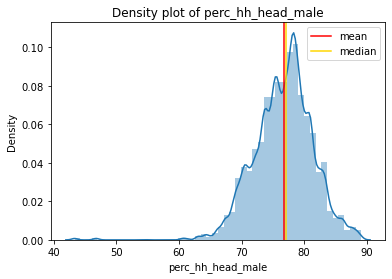

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


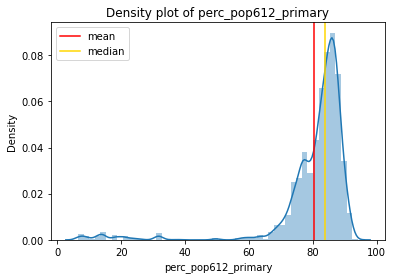

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


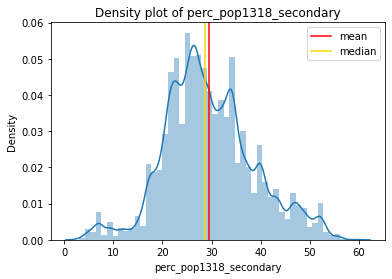

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


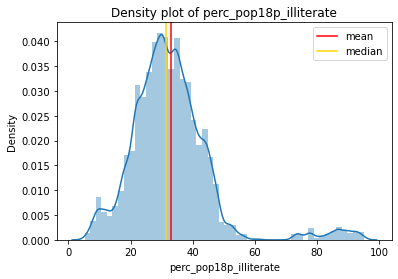

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


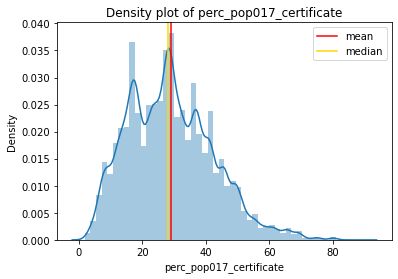

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


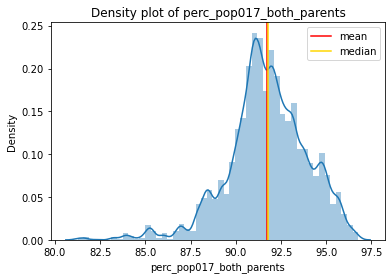

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


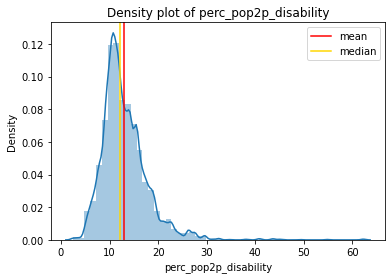

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


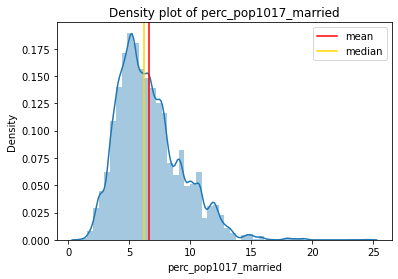

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


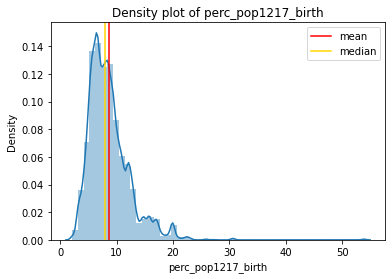

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


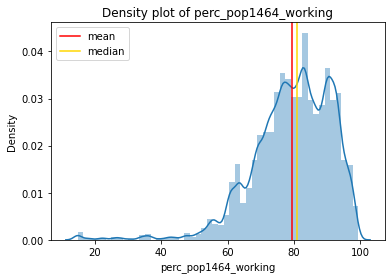

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


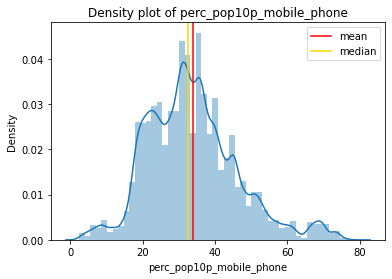

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


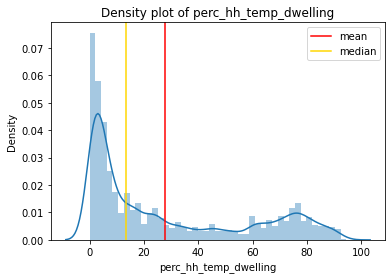

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


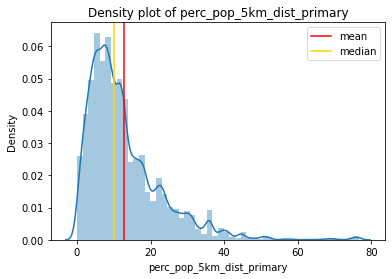

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


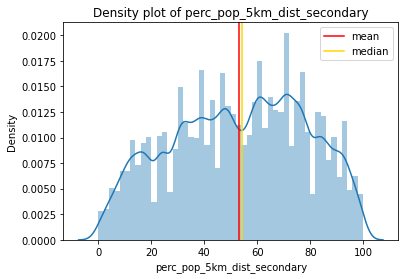

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


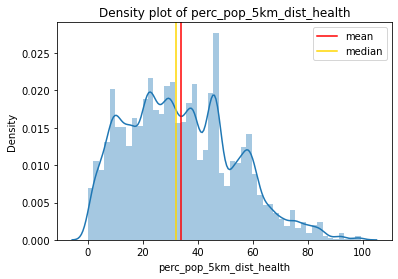

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


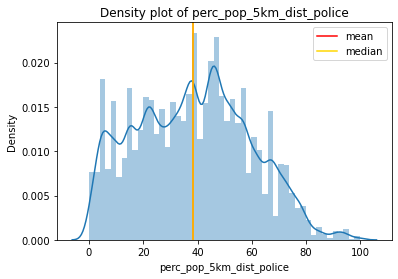

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


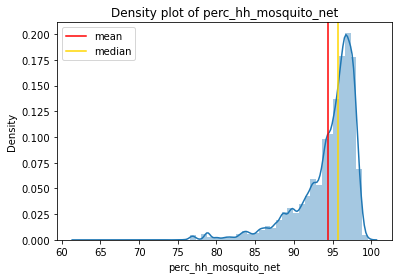

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


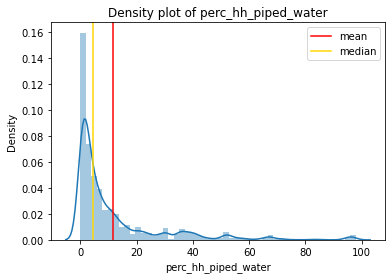

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


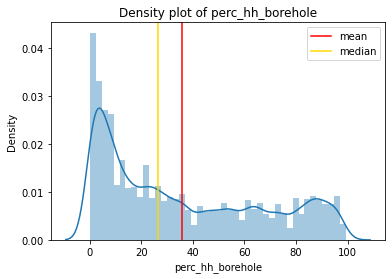

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


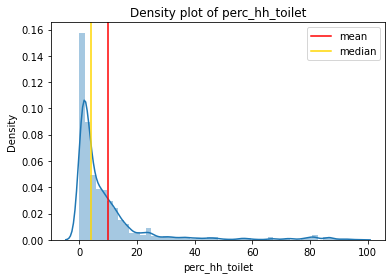

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


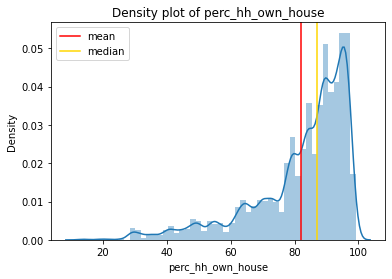

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


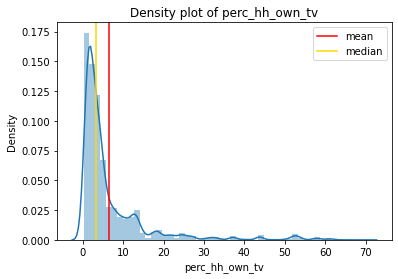

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


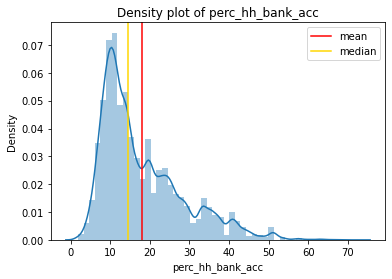

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


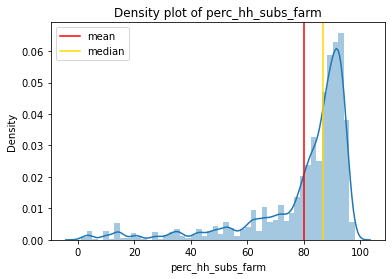

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


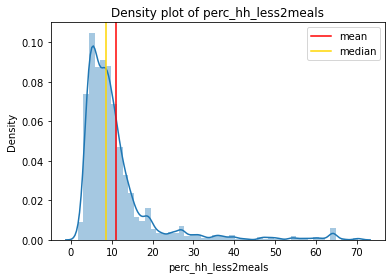

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


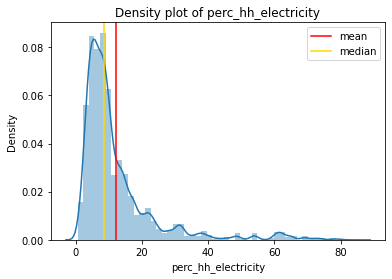

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


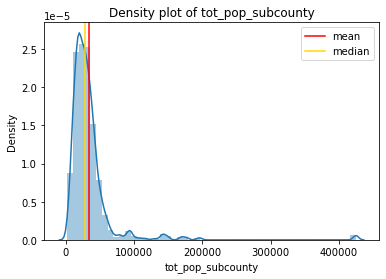

In [38]:
# showing distribution of value we want to inpute and where mean/median is situated
for col in cols_to_impute:
    plt.figure()
    sns.distplot(master_df_clean_numerical[col])
    plt.axvline(master_df_clean_numerical[col].mean(), c='r', label='mean')
    plt.axvline(master_df_clean_numerical[col].median(), c='gold', label='median')
    plt.legend()
    plt.title(f'Density plot of {col}')
    plt.show()

Median is a better alternative to mean as it is more representative of our dataset.

In [45]:
# fill missing values with adm4 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm4x')

#checking remaining null values
master_df_clean.isna().sum().sum()

/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is tryi

/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is tryi

353875

In [46]:
# fill missing values with adm3 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm3')

#checking remaining null values
master_df_clean.isna().sum().sum()

/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is tryi

/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df.groupby(region)[col].transform('median'))
/Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py:35: SettingWithCopyWarning: 
A value is tryi

245713

In [48]:
# fill missing values with adm2 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm2')

#checking remaining null values
master_df_clean.isna().sum().sum()

238099

In [49]:
# fill missing values with adm1 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm1')

#checking remaining null values
master_df_clean.isna().sum().sum()

238099

In [50]:
# fill the final null values with the median value of the whole country
for col in cols_to_impute:
    master_df_clean[col] = master_df_clean[col].fillna(
        master_df_clean[col].median())

# check remaining null values
master_df_clean.isna().sum().sum()

237640

In [ ]:
#impute missing fatalities/events

In [16]:
#duplicates 2x, null, types, column names, drop columns
#fatalities/events by adm3
#normalize data
#change categorical and dummies

## EDA

In [17]:
#outcome is water functioning

In [18]:
#data dictionary